In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1
df = pd.read_csv('medical_examination.csv')

# 2
df['overweight'] = (df['weight']/((df['height']/100)**2) > 25).astype(int)

# 3
df['cholesterol'] = (df['cholesterol']>1).astype(int)
df['gluc'] = (df['gluc']>1).astype(int)

# 4
def draw_cat_plot():
    # 5
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active','alco','cholesterol','gluc','overweight','smoke'])
    


    # 6
    df_cat = df_cat.groupby(['cardio','variable','value']).size().reset_index(name='total')
    

    # 7



    # 8
    fig = sns.catplot(data=df_cat, kind='bar', x='variable', y='total', hue='value', col='cardio').fig
    


    # 9
    fig.savefig('catplot.png')
    plt.close()
    return fig


# 10
def draw_heat_map():
    # 11
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975)) ]

    # 12
    corr = df_heat.corr(numeric_only=True)

    # 13
    mask = np.triu(np.ones_like(corr, dtype= bool))



    # 14
    fig, ax = plt.subplots(figsize=(12,10))

    # 15
    sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', center=0, square=True, linewidths=0.5, cbar_kws={'shrink':0.5},
                cmap='icefire', ax=ax)


    # 16
    fig.savefig('heatmap.png')
    plt.close()
    return fig


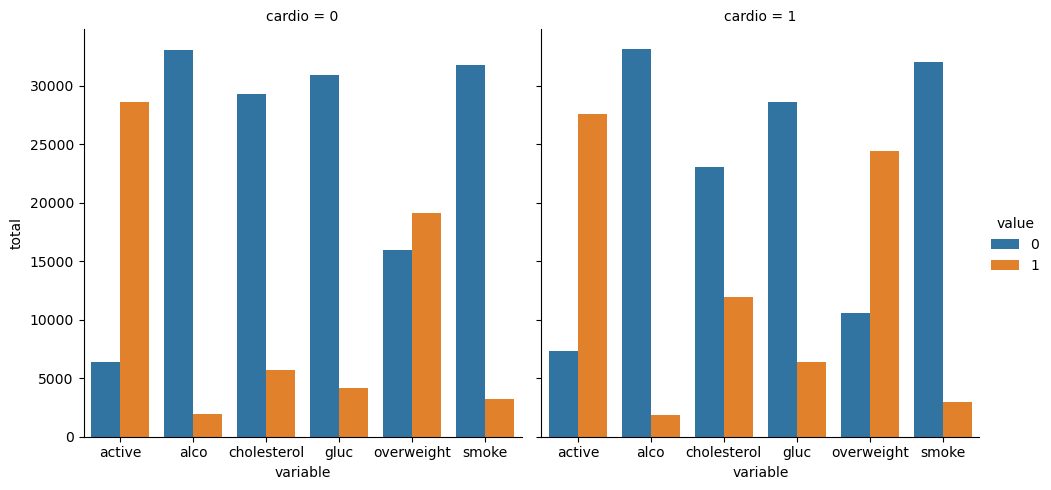

In [41]:
draw_cat_plot()

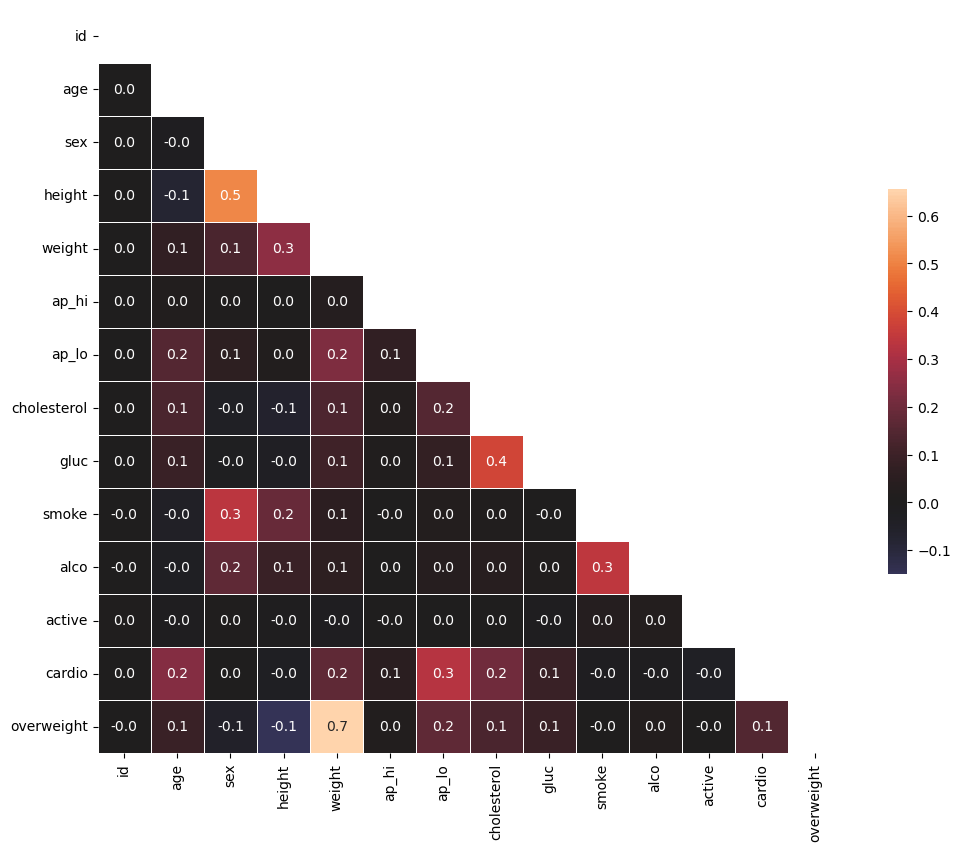

In [101]:
draw_heat_map()

In [104]:
print(corr.min().min(), corr.max().max())

NameError: name 'corr' is not defined